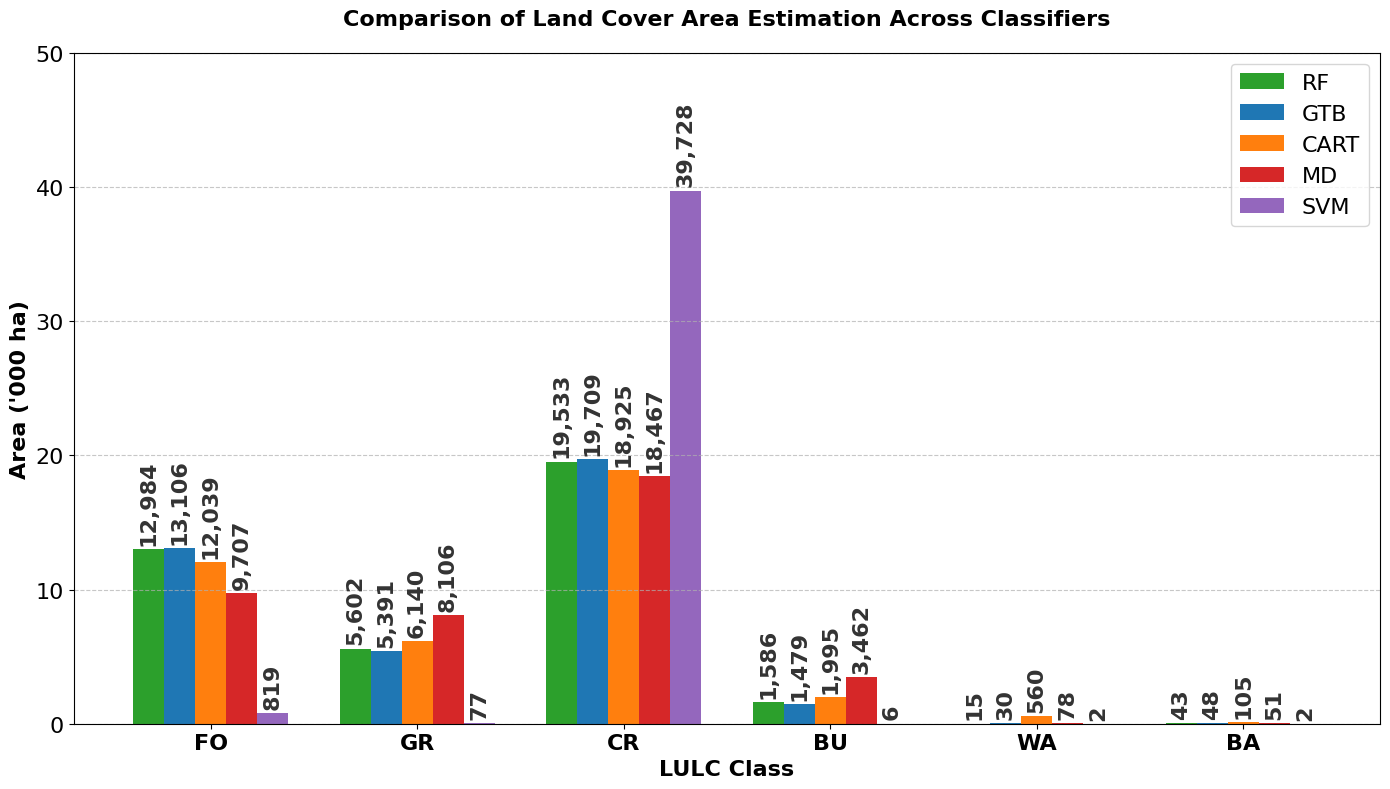

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data from the classification results
data = {
    'Class': ['FO', 'GR', 'CR', 'BU', 'WA', 'BA'], # Updated abbreviations (Urban -> BU)
    'RF': [12984.49, 5601.89, 19533.39, 1585.74, 15.19, 42.90],
    'GBM': [13106.05, 5391.40, 19709.19, 1479.03, 30.39, 47.55],
    'CART': [12039.48, 6140.05, 18924.73, 1994.65, 559.50, 105.20],
    'MinDist': [9707.08, 8106.39, 18466.56, 3461.66, 78.07, 50.77],
    'SVM': [819.31, 76.53, 39727.94, 5.99, 2.32, 1.52]
}

df = pd.DataFrame(data)

# Setting up the plot
x = np.arange(len(df['Class']))
width = 0.15

plt.figure(figsize=(14, 8))

# Plotting each classifier
b1 = plt.bar(x - 2*width, df['RF'], width, label='RF', color='#2ca02c')
b2 = plt.bar(x - width, df['GBM'], width, label='GTB', color='#1f77b4')
b3 = plt.bar(x, df['CART'], width, label='CART', color='#ff7f0e')
b4 = plt.bar(x + width, df['MinDist'], width, label='MD', color='#d62728')
b5 = plt.bar(x + 2*width, df['SVM'], width, label='SVM', color='#9467bd')



# Loop through all bar containers and add formatted vertical text labels (keeping exact values with commas)
for bars in [b1, b2, b3, b4, b5]:
    formatted_labels = [f'{int(round(val)):,}' for val in bars.datavalues]
    plt.bar_label(bars, labels=formatted_labels, padding=3, rotation=90, fontsize=16, fontweight='bold', color='#333333')



# Extend Y-axis limit by 15% to ensure the tallest vertical text isn't cut off
max_val = df.max(numeric_only=True).max()
plt.ylim(0, max_val * 1.15)

# Setting exact ticks for 0, 10k, 20k, 30k, 40k, 50k
plt.yticks(np.arange(0, 50001, 10000), fontsize=16)

# Adding labels and styling for publication
plt.xlabel('LULC Class', fontweight='bold', fontsize=16)
plt.ylabel("Area ('000 ha)", fontweight='bold', fontsize=16)
plt.title('Comparison of Land Cover Area Estimation Across Classifiers', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, df['Class'], fontsize=16, fontweight='bold')
plt.legend(loc='upper right', fontsize=16)

# Format the Y-axis to display in thousands (e.g., 10000 -> 10)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda val, loc: f"{int(val/1000)}"))

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('area_comparison_chart_thousands.png', dpi=300)
plt.show()

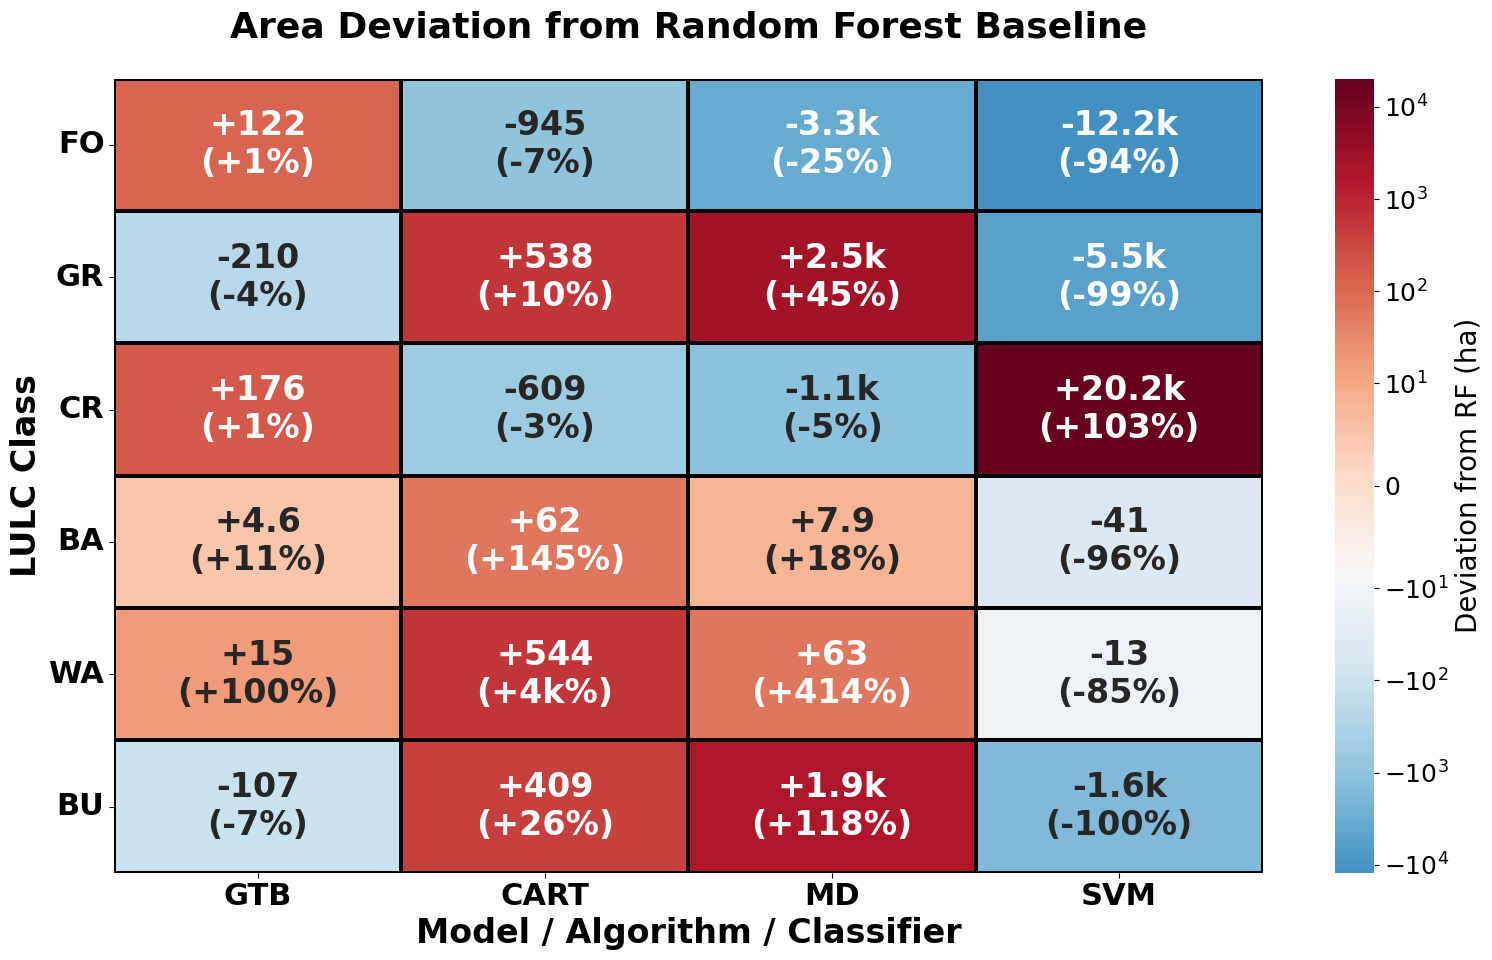

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import SymLogNorm

# 1. Define Data (Updated with new values and ordered: FO, GR, CR, BA, WA, BU)
data = {
    'Class': ['FO', 'GR', 'CR', 'BA', 'WA', 'BU'],
    'RF':      [12984.49, 5601.89, 19533.39, 42.90,  15.19,  1585.74],
    'GTB':     [13106.05, 5391.40, 19709.19, 47.55,  30.39,  1479.03],
    'CART':    [12039.48, 6140.05, 18924.73, 105.20, 559.50, 1994.65],
    'MD':      [9707.08,  8106.39, 18466.56, 50.77,  78.07,  3461.66],
    'SVM':     [819.31,   76.53,   39727.94, 1.52,   2.32,   5.99]
}

df = pd.DataFrame(data)

# 2. Calculate Deviations and Formatting
models = ['GTB', 'CART', 'MD', 'SVM']
heatmap_vals = pd.DataFrame(index=df['Class'], columns=models)
annot_labels = pd.DataFrame(index=df['Class'], columns=models)

for i, row in df.iterrows():
    cls = row['Class']
    rf_val = row['RF']
    for m in models:
        dev = row[m] - rf_val
        pct = (dev / rf_val) * 100

        heatmap_vals.loc[cls, m] = dev

        # Formatting Value (k for thousands)
        if abs(dev) >= 1000:
            dev_str = f"{dev/1000:+.1f}k"
        elif abs(dev) >= 10:
            dev_str = f"{dev:+.0f}"
        else:
            dev_str = f"{dev:+.1f}"

        # Formatting Percentage
        if abs(pct) >= 1000:
             pct_str = f"{pct/1000:+.0f}k%"
        else:
             pct_str = f"{pct:+.0f}%"

        annot_labels.loc[cls, m] = f"{dev_str}\n({pct_str})"

heatmap_vals = heatmap_vals.astype(float)

# 3. Plot with Large Fonts
plt.figure(figsize=(16, 10)) # Increased figure size further for larger fonts
plt.rcParams.update({'font.size': 20})

norm = SymLogNorm(linthresh=10, linscale=1, vmin=heatmap_vals.min().min(), vmax=heatmap_vals.max().max())

ax = sns.heatmap(heatmap_vals, annot=annot_labels, fmt="", cmap="RdBu_r", center=0, norm=norm,
                 linewidths=1.5, linecolor='black',
                 cbar_kws={'label': 'Deviation from RF (ha)'},
                 annot_kws={"size": 24, "weight": "bold"}) # Increased annotation size

# Titles and Axis Labels
plt.title('Area Deviation from Random Forest Baseline', fontsize=26, fontweight='bold', pad=30)
plt.ylabel('LULC Class', fontsize=24, fontweight='bold')
plt.xlabel('Model / Algorithm / Classifier', fontsize=24, fontweight='bold')
plt.yticks(rotation=0, fontsize=22, fontweight='bold')
plt.xticks(fontsize=22, fontweight='bold')

# Customize colorbar label size
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_size(20)
cbar.ax.tick_params(labelsize=18)

plt.tight_layout()
plt.savefig('Area_Deviation_Heatmap_Updated.png', dpi=300)
plt.show()